### Image Augmentation

OpenCV solution

In [1]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# access current directory
root_path = os.getcwd()
# background path
background_path = root_path+r"\test_imgs\background.jpg"
# foregroun path
foreground_path = root_path+r"\test_imgs\foreground.jpg"
# mask path
mask_path = root_path+r"\test_imgs\mask.png"

In [3]:
# read the images via opencv 
cv_background = cv2.imread(background_path)
cv_foreground = cv2.imread(foreground_path)
cv_mask = cv2.imread(mask_path)

In [4]:
if (type(cv_background )== None or type(cv_foreground) == None or type(cv_mask) == None):
    print('...Invalid Image Path...')
else:
    print("Success")

Success


In [5]:
# extract red channel from cv_mask
# BGR
red_channel = cv_mask[:,:,2]
print(red_channel.shape)
plt.imshow(red_channel)

In [10]:
width, height = red_channel.shape
print(height)
print(width)

2048
1536


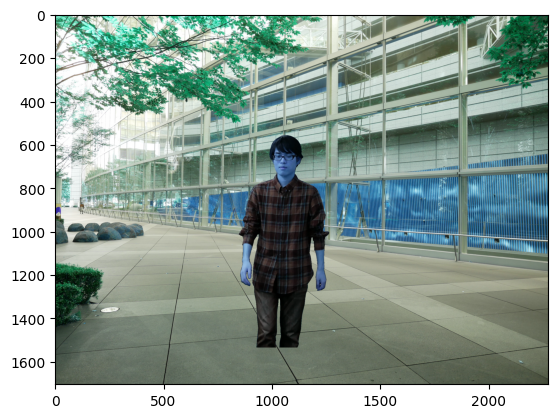

In [13]:
count = 0

cv_foreground_copy = cv_foreground.copy()
cv_background_copy = cv_background.copy()

for row in range(width):
    for col in range(height):
        cur_red_value = red_channel[row, col]
        if cur_red_value == 255:
            cv_background_copy[row, col] = cv_foreground_copy[row, col]
plt.imshow(cv_background_copy)

Pillow solution

In [14]:
pil_background = Image.open(background_path)
pil_foreground = Image.open(foreground_path)
pil_mask = Image.open(mask_path)

if (type(pil_background) == None or type(pil_foreground) == None or type(pil_mask) == None):
    print('...Invalid Image path...')
else:
    print('Success')

Success


In [15]:
width, height = pil_foreground.size
print(width, height)

2048 1536


In [17]:
pil_mask_pixel = pil_mask.load()
pil_foreground_pixel = pil_foreground.load()
pil_background_pixel = pil_background.load()

In [18]:
for row in range(width):
    for col in range(height):
        if pil_mask_pixel[row, col] == (255,0,0):
            pil_background_pixel[row, col] = pil_foreground_pixel[row, col]

In [20]:
import numpy as np

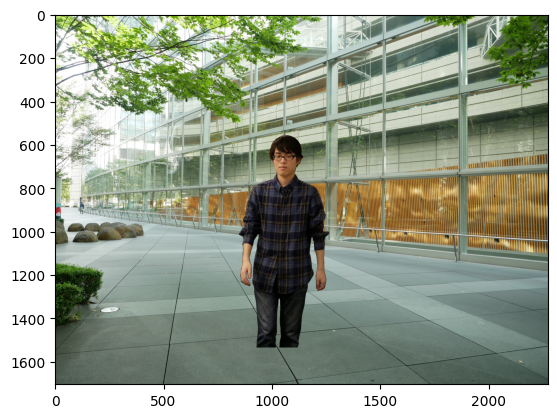

In [22]:
np_image = np.array(pil_background)
plt.imshow(np_image)